In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
#%matplotlib inline

import os
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4, suppress=True)
%cd -q ../test/

## Running simulations on using the Prior on first-order distribution of orientations

In [2]:
%%writefile experiment_firstorder.py
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

$ python experiment_fig-firstorder.py

"""
import numpy as np
from SparseEdges import SparseEdges
seed, N_image, N = 21341353, 100, 1024
name_database = 'serre07_distractors'

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.datapath = 'database/'
mp.pe.seed = seed # this ensures that all image lists are the same for the different experiments
mp.pe.N_image = N_image
mp.pe.N = N

# control experiment
print ('Range of spatial frequencies: ', mp.sf_0)
print ('Range of angles: ', mp.theta*180./np.pi)
imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla', name_database=name_database)

try:
    #imageslist_noise, edgeslist_noise, RMSE_noise = mp.process(exp='prior_vanilla_noise_' + str(mp.pe.noise).replace('.', '_'), name_database=name_database, noise=mp.pe.noise)

    #mp.MP_rho = .994304364466
    #imageslist, edgeslist, RMSE = mp.process(exp='prior_quant', name_database=name_database)
    #mp.MP_rho = None

    # first-order prior
    
    # TODO: make B_theta vary
    
    v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
    v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]
    v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
    v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]

    z = np.linspace(0, 1., mp.pe.n_theta+1)
    P = np.cumsum(np.hstack((0, v_hist[-1]/2, v_hist[:-1], v_hist[-1]/2)))
    theta_prior = np.interp(z, P, np.hstack((v_theta_edges[0]-v_theta_bin/2, v_theta_edges[:-1], v_theta_edges[-1]-v_theta_bin/2)))
    print('Min', theta_prior.min()*180/np.pi, ', Max=', theta_prior.max()*180/np.pi)

    mp_prior = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
    mp_prior.pe.datapath = 'database/'
    mp_prior.pe.seed = seed # this ensures that all image lists are the same for the different experiments
    mp_prior.pe.N_image = N_image
    mp_prior.pe.N = N
    mp_prior.theta = theta_prior[1:]
    print('orientations used in the coding process=', mp_prior.theta*180./np.pi)

    imageslist, edgeslist, RMSE =  mp_prior.process(exp='prior_firstorder', name_database=name_database)
    #mp.MP_rho = .994304364466
    #imageslist, edgeslist, RMSE = mp.process(exp='prior_quant_firstorder', name_database=name_database)
    #mp.MP_rho = None
    #imageslist_noise, edgeslist_noise, RMSE_noise = mp.process(exp='prior_firstorder_noise_' + str(mp.pe.noise).replace('.', '_'), name_database=name_database, noise=mp.pe.noise)
    #except:
    #    print('run again once first batches are finished ')

except TypeError:
    print('Extraction not finished')


Overwriting experiment_firstorder.py


In [3]:
%run experiment_firstorder.py

Range of spatial frequencies:  [0.4545 0.2935 0.1895 0.1224 0.079  0.051  0.0329 0.0213 0.0137 0.0089
 0.0057]
Range of angles:  [-82.5 -75.  -67.5 -60.  -52.5 -45.  -37.5 -30.  -22.5 -15.   -7.5   0.
   7.5  15.   22.5  30.   37.5  45.   52.5  60.   67.5  75.   82.5  90. ]


UnboundLocalError: local variable 'v_theta_edges' referenced before assignment

## Analysing results on using the Prior on first-order distribution of orientations

First, we retrieve edges from a prior edge extraction

In [4]:
import numpy as np
from SparseEdges import SparseEdges
seed, N_image, N = 21341353, 100, 1024
name_database = 'serre07_distractors'

mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.datapath = 'database/'
mp.pe.seed = seed # this ensures that all image lists are the same for the different experiments
mp.pe.N_image = N_image
mp.pe.N = N

imageslist, edgeslist, RMSE = mp.process(exp='prior_vanilla', name_database=name_database)

In [5]:
fig_width_pt = 318.670  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches
#mp.pe.figpath = '../test/results'
#mp.pe.figpath = '../figures'

TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'float'

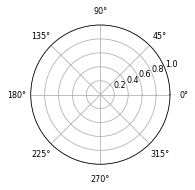

In [6]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
ax = fig.add_subplot(111, facecolor='w', polar=True)
fig, ax = mp.histedges_theta(edgeslist, fig=fig, ax=ax)
v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
ax.plot(v_theta_edges, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')
ax.plot(v_theta_edges+np.pi, np.ones_like(v_theta_edges)*np.sqrt(v_hist.mean()), 'r--')

mp.savefig(fig, 'firstorder_A', figpath = '../figures');

In [ ]:
!ls ../figures/firstorder_A*

In [ ]:
v_hist, v_theta_edges = mp.histedges_theta(edgeslist, display=False)
v_theta_middles, v_theta_bin  = (v_theta_edges[1:]+v_theta_edges[:-1])/2, v_theta_edges[1]-v_theta_edges[0]

In [ ]:
print ('angles for the edges of bins (deg) = ', mp.theta*180/np.pi)
print ('angles for the edges of bins (deg) = ', mp.binedges_theta*180/np.pi)
print ('angles for the edges of bins (deg) = ', v_theta_edges*180/np.pi)
print ('angles for the middle of bins (deg) = ', v_theta_middles*180/np.pi)
print ('angles for the center of bins (deg) = ', (v_theta_edges-v_theta_bin/2)*180/np.pi)

Now, we may use this statistics:


In [ ]:
z = np.linspace(0, 1., mp.pe.n_theta+1)
P = np.cumsum(np.hstack((0, v_hist[-1]/2, v_hist[:-1], v_hist[-1]/2)))
theta_prior = np.interp(z, P, np.hstack((v_theta_edges[0]-v_theta_bin/2, v_theta_edges[:-1], v_theta_edges[-1]-v_theta_bin/2))) #% np.pi

In [ ]:
z = z[1:]
P = P[1:]
print ('z = ', z)
print ('P = ', P)
print ('uniform angles (deg) = ', mp.theta*180/np.pi)
print ('prior  angles (deg) = ', theta_prior*180/np.pi)
print ('prior  angles (deg) = ', mp_prior.theta*180/np.pi)

In [ ]:
mp.init_binedges()

fig, [[B, C], [A, D]] = plt.subplots(2, 2, figsize=(fig_width, fig_width/1.618), subplot_kw={'facecolor':'w'}, sharex=True)
for ax in [A, B, C, D]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig.subplots_adjust(wspace=0.1, hspace=0.1,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.175)
A.bar(v_theta_edges-v_theta_bin, np.hstack((v_hist[-1], v_hist)), alpha=.6, width=v_theta_bin, align='edge')
A.hlines([v_hist.mean()], [v_theta_edges[0]-v_theta_bin/8.], [v_theta_edges[-1]+v_theta_bin/8.], 
         lw=.5, color='r', linestyle='--',
         alpha=.6)
plt.setp(A, yticklabels=[], ylabel=r'$p(\theta)$',#xlim=[v_theta_edges[0]-v_theta_bin/4, v_theta_edges[-1]+v_theta_bin/4], 
         #xticks=[-np.pi/2, 0, np.pi/2], xticklabels=[r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$'], 
         xticks=[0, np.pi/2], xticklabels=[r'$0$', r'$\frac{\pi}{2}$'], 
         xlabel=r'$\theta$ (rad)')
B.step(v_theta_edges, P, where='pre')
B.vlines(((mp.theta[:-1] + np.pi/2 + v_theta_bin/4)  % np.pi ) - np.pi/2  + v_theta_bin/4, [0], P[1:], lw=.5, color='k', alpha=.6)
plt.setp(B, xticks=[], ylim=[0, 1.02], yticks=[0., 0.5, 1.], yticklabels=['0', r'$\frac{1}{2}$', '1'], ylabel=r'$P(\theta)$')#, xlim=[v_theta_edges[0], v_theta_edges[-1]]
#B.text(-np.pi/2*1.65, 1.05, '(B)')
C.plot(v_theta_edges, P)
C.hlines(z[:-1], [v_theta_edges[0]-v_theta_bin/2], theta_prior[1:], lw=.5)
C.hlines([1], [v_theta_edges[0]-v_theta_bin/2], theta_prior[-1], lw=.5)
C.vlines(theta_prior[1:], [0], z[:-1], lw=.5, color='r', alpha=.6)
C.vlines(theta_prior[-1], [0], [1], lw=.5, color='r', alpha=.6)
#C.text(-np.pi/2*1.1, 1.05, '(C)')
bord = 0.03
plt.setp(C, ylim=[0,1.02], xticks=[-np.pi/2, 0, np.pi/2], xticklabels=['', '', ''], yticks=[0., 0.5, 1.], yticklabels=['', '', ''],
         xlim=[v_theta_edges[0]-v_theta_bin/2-bord, v_theta_edges[-1]-v_theta_bin/2+bord])#
#D.axis('tight')
#D.vlines((theta_prior + np.pi/2) % np.pi  - np.pi/2, [0], np.ones_like(z), lw=.5, color='r')
D.vlines(theta_prior, [0], np.ones_like(z), lw=.5, color='r', alpha=.6)
D.vlines([-np.pi/2, np.pi/2], [0], np.ones_like(z), lw=.5, color='r', alpha=.6)
#D.vlines(((mp.theta[:-1] + np.pi/2 + v_theta_bin/2)  % np.pi ) - np.pi/2  - v_theta_bin/2, [0], np.ones_like(z), lw=.5, color='k', alpha=.6)
#D.plot(theta, np.ones_like(z), ms='^', lw=0, color='r')
plt.setp(D, ylim=[0, 1.1], yticks=[], xlim=[v_theta_edges[0]-v_theta_bin/2-bord, v_theta_edges[-1]-v_theta_bin/2+bord], 
         xticks=[-np.pi/2, 0, np.pi/2], xticklabels=[r'$\frac{-\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$'], 
         #xticks=[0, np.pi/2], xticklabels=[r'$0$', r'$\frac{\pi}{2}$'], 
         xlabel=r'$\theta$ (rad)')
#D.text(-np.pi/2*1.1, 1.35, '(D)')
mp.savefig(fig, 'laughlin', figpath = '../figures')
fig

### analyzing efficiency

In [ ]:
experiments = ['prior_vanilla', 'prior_firstorder']
databases = [name_database] * len(experiments)
labels = ['control', 'with prior']
mps = [mp, mp_prior]
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.3, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C', figpath = '../figures')

In [ ]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.55, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C', figpath = '../figures')

In [ ]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.8, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C', figpath = '../figures')

In [ ]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps, experiments=experiments, databases=databases, fig=fig, labels=labels, 
                  color=[0., 0., 1.], threshold=0.3, ref=0, scale=True)
mp.savefig(fig, 'firstorder_C', figpath = '../figures')

### verifying the histogram of output orientations

In [ ]:
imageslist, edgeslist, RMSE = mp_prior.process(exp='prior_firstorder', name_database=name_database)

In [ ]:
mp_prior.init_binedges(mp_theta=mp_prior.theta)

print ('prior angles (deg) = ', mp_prior.theta*180/np.pi)

print ('bin angles (deg) = ',  mp_prior.binedges_theta*180/np.pi)

theta = edgeslist[2, ...].ravel()
value = edgeslist[4, ...].ravel()

print('Min', theta.min()*180/np.pi, ', Max=', theta.max()*180/np.pi)
print ('selected angles (deg) = ',  np.unique(theta)*180/np.pi)
print ('mp_prior.binedges_theta angles (deg) = ',  mp_prior.binedges_theta*180/np.pi)
print ('diff angles (deg) = ', (np.unique(theta) - mp_prior.theta) *180/np.pi)

weights = np.absolute(value)/(np.absolute(value)).sum()
v_hist, v_theta_edges_ = np.histogram(theta, bins=mp_prior.binedges_theta, density=True, weights=weights)
print ('bin angles (deg) = ',  v_theta_edges_*180/np.pi)
print ('Histogram =', v_hist/v_hist.mean())

In [ ]:
fig = plt.figure(figsize=(fig_width/1.618, fig_width/1.618))
ax = fig.add_subplot(111, facecolor='w', polar=True)
fig, ax = mp_prior.histedges_theta(edgeslist, fig=fig, ax=ax)
v_hist, v_theta_edges = mp_prior.histedges_theta(edgeslist, mp_theta=mp_prior.theta, display=False)
mp_prior.savefig(fig, 'firstorder_B', figpath = '../figures')

In [ ]:
%cd -q ../notebooks

## some book keeping for the notebook

In [ ]:
%load_ext watermark
%watermark

In [ ]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, SLIP, LogGabor, SparseEdges